Mini-batch GD Theta: [[4.22191654]
 [2.7700278 ]]


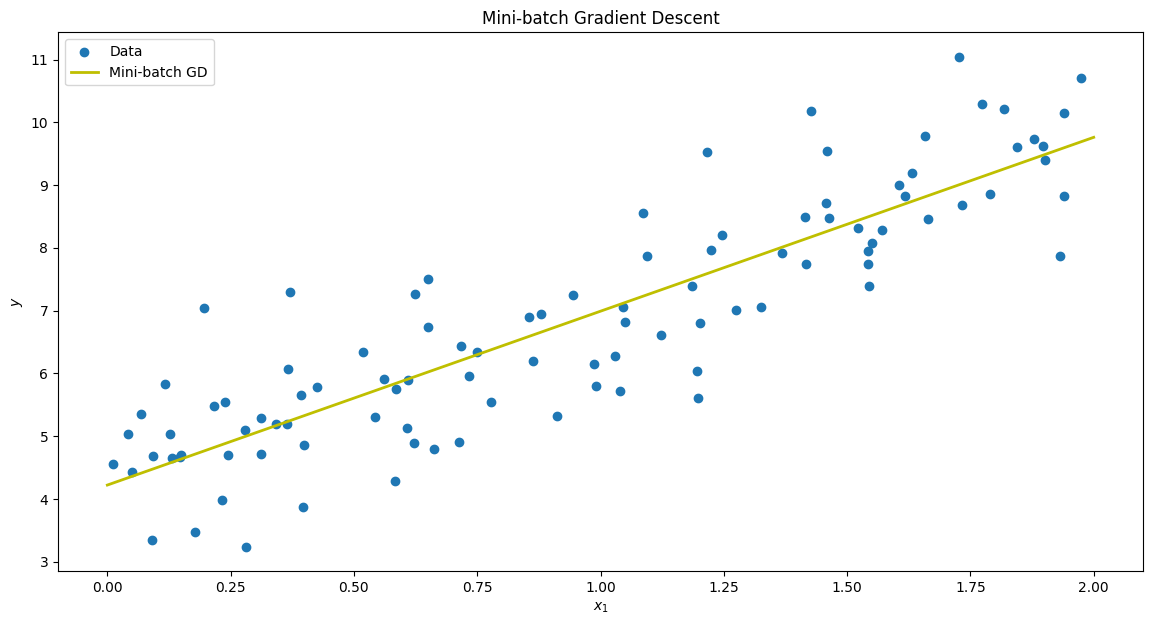

In [12]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X=2* np.random.rand(100, 1)
y=4+3*X+np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
# Mini-batch Gradient Descent
def mini_batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=50, batch_size=20):
  m = len(y)
  theta = np.random.randn(2, 1) 
  for iteration in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
      xi = X_shuffled[i:i+batch_size]
      yi = y_shuffled[i:i+batch_size]
      gradients = 2/len(xi) * xi.T.dot(xi.dot(theta) - yi)
      theta = theta - learning_rate * gradients
  return theta

theta_mbgd = mini_batch_gradient_descent(X_b, y)
print("Mini-batch GD Theta:", theta_mbgd)

plt.figure()
plt.scatter(X, y, label="Data")
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict_mbgd = X_new_b.dot(theta_mbgd)
plt.plot(X_new, y_predict_mbgd, "y-", linewidth=2, label="Mini-batch GD")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.legend(loc="upper left")
plt.title("Mini-batch Gradient Descent")
plt.show()